In [307]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_all = np.load('data_raw_10000.npz')
kernel = image_all['arr_0'][:,0,:,:]
true = image_all['arr_0'][:,2,:,:]
blur = image_all['arr_0'][:,1,:,:]


In [308]:
blur_max = np.absolute(blur).max(axis=-1).max(axis=-1).max(axis=-1)
true_max = np.absolute(true).max(axis=-1).max(axis=-1).max(axis=-1)
maximum = np.maximum(blur_max, true_max)
image_all['arr_0'].shape

(10000, 6, 3, 35, 35)

(array([1.000e+00, 7.000e+00, 1.190e+02, 6.750e+02, 1.765e+03, 2.629e+03,
        2.113e+03, 1.212e+03, 5.550e+02, 3.140e+02, 2.080e+02, 1.220e+02,
        7.600e+01, 4.900e+01, 3.700e+01, 3.300e+01, 1.400e+01, 1.500e+01,
        1.200e+01, 9.000e+00, 7.000e+00, 5.000e+00, 7.000e+00, 0.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.0143088 , -0.01060076, -0.00689271, -0.00318466,  0.00052338,
         0.00423143,  0.00793947,  0.01164752,  0.01535557,  0.01906361,
         0.02277166,  0.0264797 ,  0.03018775,  0.03389579,  0.03760384,
         0.04131189,  0.04501993,  0.04872798,  0.05243602,  0.05614407,
         0.05985212,  0.06356017,  0.06726821,  0.07097626,  0.0746843 ,
         0.

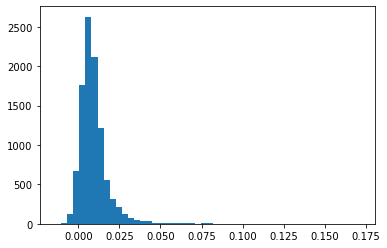

In [309]:
plt.hist(blur.mean(axis=(1,2,3))/blur.max(axis=(1,2,3)),bins=50)

(array([2984., 4849.,  806.,  314.,  206.,  160.,   99.,   72.,   54.,
          41.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
       dtype=float32),
 <BarContainer object of 10 artists>)

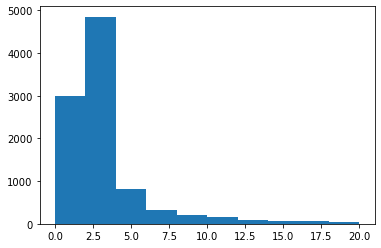

In [310]:
plt.hist(np.max(blur,axis=(1,2,3)),range=(0,20))

In [311]:
blur_input=[]
true_input = []
kernel_input = []
for ck,ct,cb in zip(kernel, true, blur):
    siglevel = np.sort(cb)[-30:].mean()
    if (siglevel<0.02):
        continue
    blr = (2.5+cb)/siglevel*0.003
    tre = ct/siglevel*0.003
    #blr [blr<0]=0
    #blr [blr>1]=1.0
    blur_input.append(blr)
    kernel_input.append(ck)
    true_input.append(tre)
blur_input = np.array(blur_input)
kernel_input = np.array(kernel_input)
true_input = np.array(true_input)
print (blur_input.shape)

(4671, 3, 35, 35)


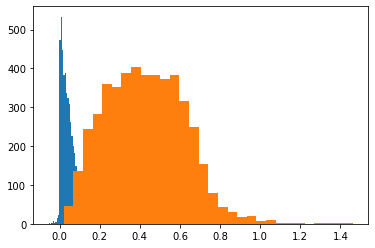

In [312]:
plt.hist(blur_input.min(axis=(1,2,3)),bins=30)
_=plt.hist(blur_input.max(axis=(1,2,3)),bins=30)

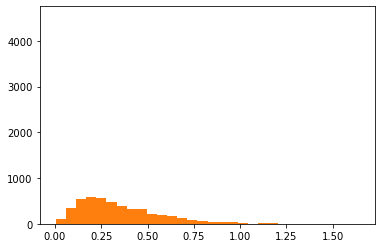

In [313]:
plt.hist(true_input.min(axis=(1,2,3)),bins=30)
_=plt.hist(true_input.max(axis=(1,2,3)),bins=30)

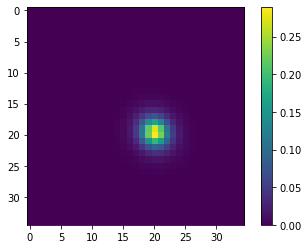

In [314]:
plt.imshow(true_input[300,2,:,:].T)
plt.colorbar()

In [315]:
blur_input = np.transpose(blur_input, axes=(0,2,3,1))
true_input = np.transpose(true_input, axes=(0,2,3,1))
kernel_input = np.transpose(kernel, axes=(0,2,3,1))



array([1.       , 1.022828 , 1.       , ..., 1.       , 1.0754551,
       1.0585397], dtype=float32)